In [1]:
import numpy as np # for mathematical operations
import pandas as pd # for data manipulation and analysis
# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the file
dt = pd.read_csv('Fish.csv')

In [3]:
dt.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
#checking the shape of the dataset
dt.shape

(159, 7)

In [5]:
# checking the datatypes
dt.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [6]:
# Statstical Analysis
dt.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [7]:
#checking the null values.
dt.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [8]:
# corealtion of the dataset
dt.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


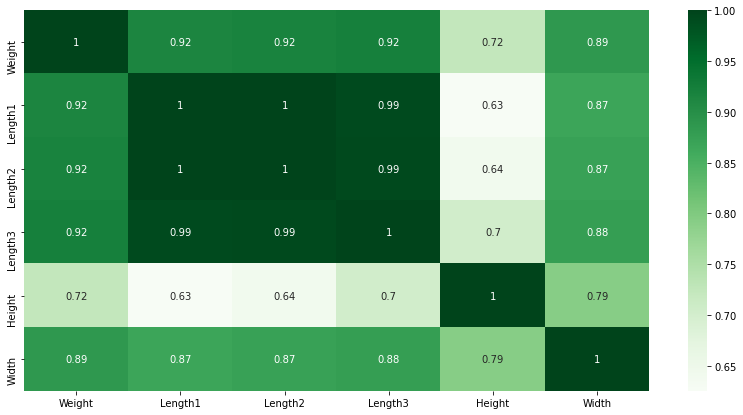

In [9]:
# ploting the heatmap on corelation 
plt.figure(figsize=(14,7))
sns.heatmap(dt.corr(),cmap='Greens',annot=True)

In [10]:
# Seprating the datset with independent and dependent variables and assinging to the x and y variables
x=dt.iloc[:,1:]
y=dt.iloc[:,0]

In [11]:
# Spliting the dataset in the form train and test, for the purpose of training and testing of the model
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25) 

In [12]:
# Scaling the data
from sklearn.preprocessing import StandardScaler 
sc_x = StandardScaler() 
xtrain = sc_x.fit_transform(xtrain) 
xtest = sc_x.transform(xtest) 

In [13]:
# Fitting the logistic Regression model
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression() 
classifier.fit(xtrain, ytrain) 

LogisticRegression()

In [14]:
# predicting the model.
y_pred = classifier.predict(xtest)

In [15]:
# confusion matrix
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(ytest, y_pred) 
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[11  0  0  0  0  0]
 [ 1  2  0  0  0  0]
 [ 0  0 14  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  6  0  0  0]
 [ 0  0  1  0  0  2]]


In [16]:
# accuracy of the model
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(ytest, y_pred)) 

Accuracy :  0.8
